# **📄 Document type classification EDA**

## Contents
- Prepare Environments
- Import Library & Define Dataset
- Load Data
- EDA


## 1. Prepare Environments

* 데이터 로드를 위한 구글 드라이브를 마운트합니다.
* 필요한 라이브러리를 설치합니다.

In [55]:
# 필요한 라이브러리를 설치합니다.
# !pip install timm
# !pip install wandb
# !pip install matplotlib
# !pip install seaborn

## 2. Import Library

In [58]:
import os
from PIL import Image  # Pillow 라이브러리에서 Image 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

from matplotlib import font_manager
# NanumGothic.otf 글꼴 경로
font_path = 'font/NanumGothic.otf'
font_prop = font_manager.FontProperties(fname=font_path)

pre_path = ''
images_folder_path = pre_path + 'data/train_kr'
meta_kr_csv_path = pre_path + 'data/meta_kr.csv'
train_kr_csv_path = pre_path + 'data/train_kr.csv'
meta_kr_df = pd.read_csv(pre_path + 'data/meta_kr.csv')
train_kr_df = pd.read_csv(pre_path + 'data/train_kr.csv')

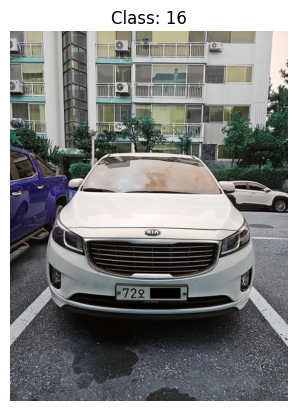

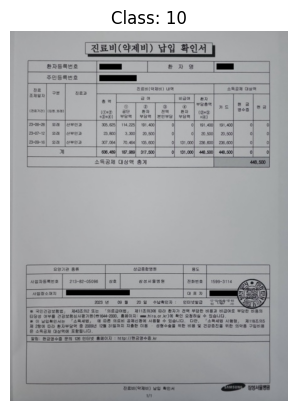

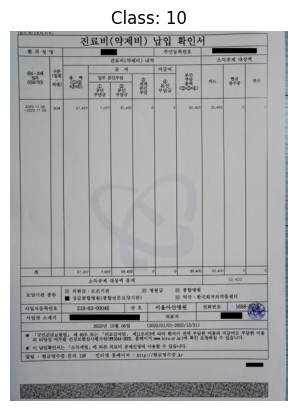

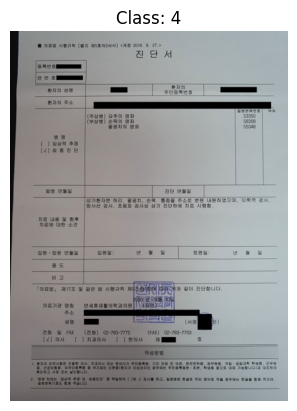

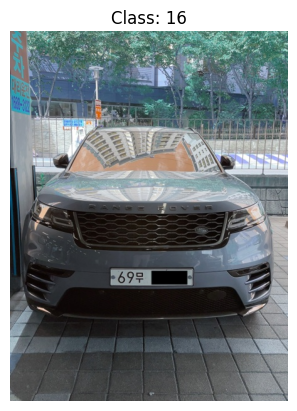

In [59]:
for index, row in train_kr_df.head().iterrows():
    image_path = images_folder_path + '/' + row['ID']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Class: {row['target']}")
    plt.axis('off')
    plt.show()

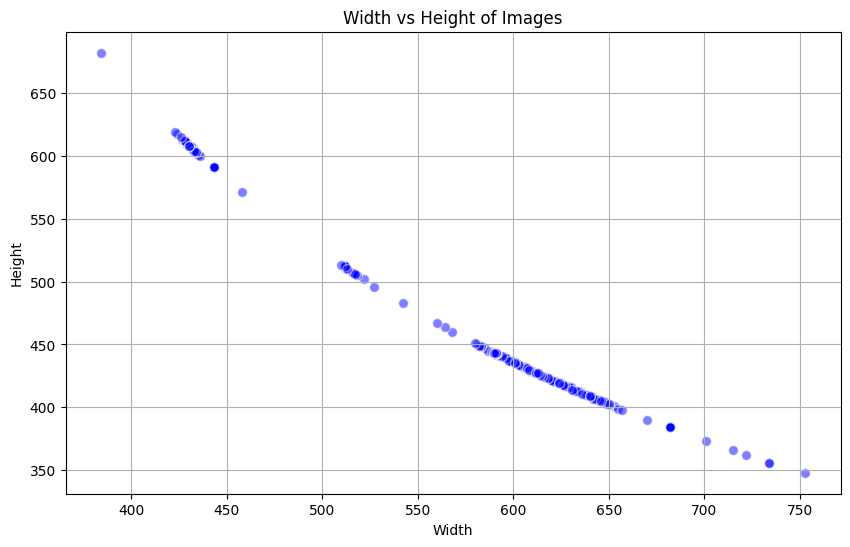

In [60]:
# 이미지의 너비와 높이를 저장할 리스트
widths = []
heights = []

# 데이터 폴더 내의 모든 이미지 파일에 대해 반복
for filename in os.listdir(images_folder_path):
    if filename.lower().endswith('.jpg'):
        image_path = os.path.join(images_folder_path, filename)
        with Image.open(image_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

# 스캐터 차트 그리기
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Width vs Height of Images')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()


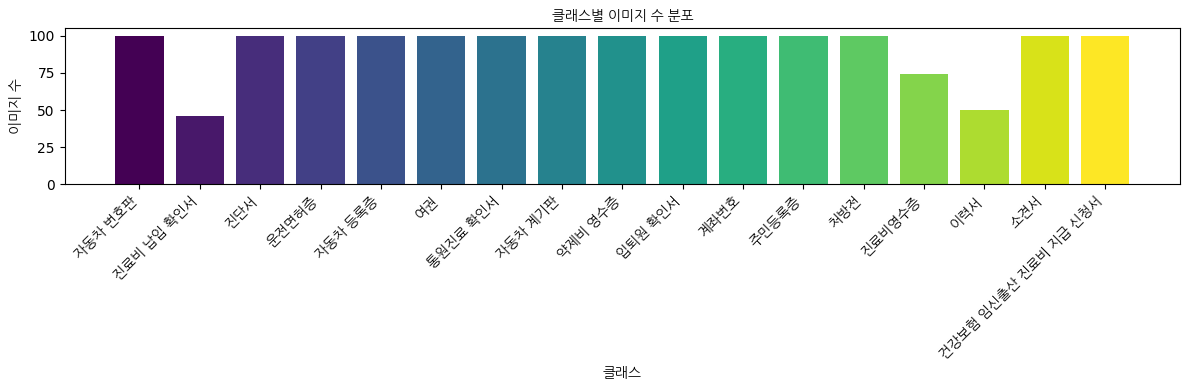

In [61]:
# meta_kr.csv 파일을 읽어 target과 class_name_ko 매핑
target_to_ko = {}
with open(meta_kr_csv_path, mode='r', encoding='utf-8') as meta_file:
    reader = pd.read_csv(meta_file)
    target_to_ko = dict(zip(reader['target'], reader['class_name_ko']))

# 각 클래스(target)의 이미지 수를 계산
class_counts = train_kr_df['target'].value_counts()

# 클래스별 한국어 이름으로 변환
class_names_ko = [target_to_ko[target] for target in class_counts.index]
class_counts_ko = class_counts.sort_index()

# viridis 색상맵을 생성
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(class_counts_ko)))

# 바 차트 생성
plt.figure(figsize=(12, 4))
plt.bar(class_names_ko, class_counts_ko, color=colors)
plt.xlabel('클래스', fontproperties=font_prop)
plt.ylabel('이미지 수', fontproperties=font_prop)
plt.title('클래스별 이미지 수 분포', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
plt.tight_layout()

# 플롯 저장 및 표시
plt.savefig('class_distribution_viridis.png', bbox_inches='tight')
plt.show()

## 클래스별 이미지 개수 파악 결론

- 클래스별 이미지 개수에 차이가 있어서, stratified k-fold 로 진행해야 할 것으로 예상된다.

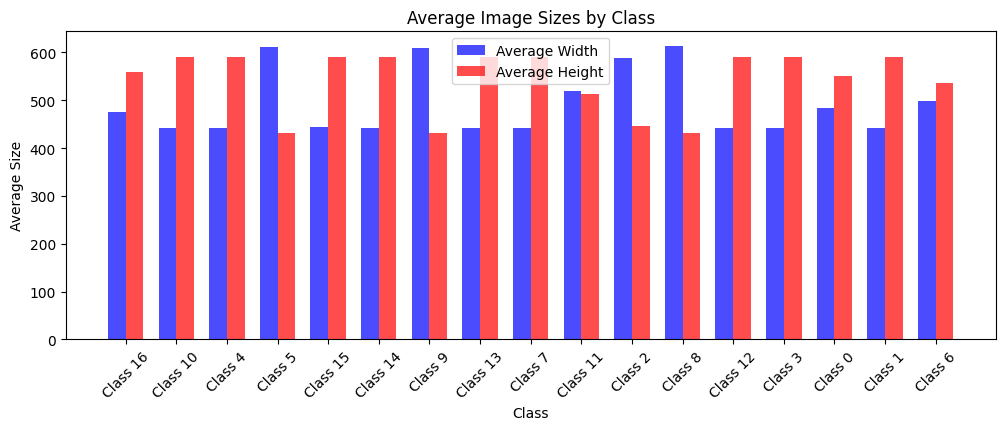

In [ ]:
class_image_sizes = {}

for index, row in train_kr_df.iterrows():
    image_path = os.path.join(images_folder_path, row['ID'])
    image = Image.open(image_path)
    width, height = image.size
    target = row['target']
    if target not in class_image_sizes:
        class_image_sizes[target] = []
    class_image_sizes[target].append((width, height))

class_average_sizes = {}

for target, sizes in class_image_sizes.items():
    widths, heights = zip(*sizes)
    class_average_sizes[target] = (sum(widths) / len(widths), sum(heights) / len(heights))

plt.figure(figsize=(12, 4))

class_labels = [f"Class {target}" for target in class_average_sizes.keys()]
average_widths = [size[0] for size in class_average_sizes.values()]
average_heights = [size[1] for size in class_average_sizes.values()]

bar_width = 0.35
index = range(len(class_labels))

plt.bar(index, average_widths, bar_width, color='b', alpha=0.7, label='Average Width')
plt.bar([i + bar_width for i in index], average_heights, bar_width, color='r', alpha=0.7, label='Average Height')
plt.title('Average Image Sizes by Class')
plt.xlabel('Class')
plt.ylabel('Average Size')
plt.xticks([i + bar_width / 2 for i in index], class_labels, rotation=45)
plt.legend()
plt.show()

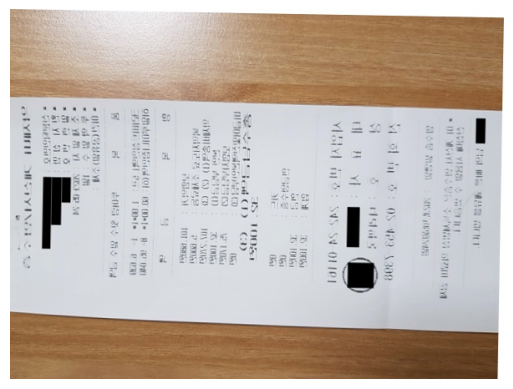

In [62]:
# 원본 이미지
image = cv2.imread("data/test/00c0dabb63ca7a16.jpg") # 이미지 로드
plt.imshow(image), plt.axis("off") # 이미지 출력
plt.show()


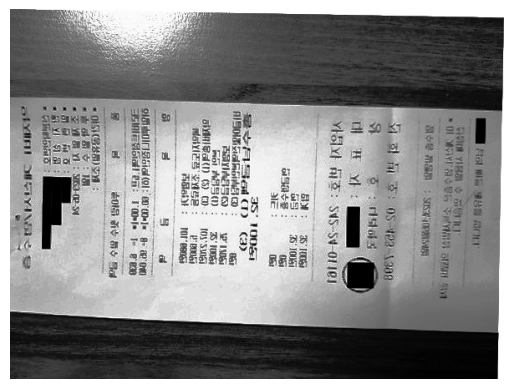

In [63]:
# 대비 높히기
image = cv2.imread("./data/test/00c0dabb63ca7a16.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비 향상
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

- 평가 데이터에 적용된 Augmentation 파악
1. Rotation
2. Flip
3. Rotation + Flip
4. Crop
5. Adding Noise